## 4.2
De una imagen que usted escoja, dejarla en escala de grises y procure que sea igual en renglones y en columnas.

Referencias: https://scipy-lectures.org/advanced/image_processing/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from pydicom import dcmread
from skimage.transform import resize

In [25]:
def show_image_plt(image, grayscale=False):
    """
        Función encargada de mostrar una imagen usando matplotlib

        Parámetros:
        -----------
        image : ndarray

        grayscale : Boolean
            Bandera que indica si la imagen de desplegará en una escala de grises
    """
    plt.title(f'{image.shape[0]}x{image.shape[1]} pixeles')
    plt.imshow(image, cmap='gray' if grayscale else None)
    plt.axis('off')
    plt.show()

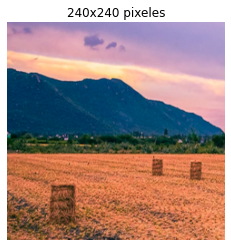

In [26]:
path = './resources'
image = Image.open(path + '/landscape.png')
show_image_plt(np.array(image))

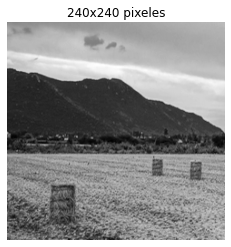

In [27]:
gs_image = image.convert('L')
show_image_plt(np.array(gs_image), grayscale=True)

Programe una función que realice decimación de una imagen, reduciéndola a la mitad de su tamaño original. Y promediando en grupos de 4.

In [28]:
def decimation(image, points):
    """
        Función encargada de realizar la decimación de imágen una cantidad n (points) de veces

        Parámetros:
        -----------
        image : ndarray
            Numpy arrary que representa los pixeles de la imagen
        points : int
            Entero indicando el facto de reescalamiento hacía abajo de una imagen
        
        Regresa:
        --------
        dec_image : ndarray
            Numpy array que representa la imagen original decimada
    """
    v_len = image.shape[0]
    h_len = image.shape[1]
    v_img = []
    for row in range(v_len):
        v_img.append(np.array(np.array_split(image[row], h_len//points)).mean(1))
    v_img = np.array(v_img).T
    dec_img = []
    for col in range(v_img.shape[0]):
        dec_img.append(np.array(np.array_split(v_img[col], h_len//points)).mean(1))
    return np.array(dec_img).T

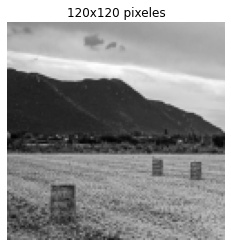

In [37]:
path = './resources'
image = Image.open(path + '/landscape.png')
gs_image = image.convert('L')
dec_img = decimation(np.array(gs_image), 2)
show_image_plt(dec_img, grayscale=True)

In [30]:
dec_img

array([[135.75, 137.5 , 136.75, ..., 177.25, 178.  , 178.  ],
       [144.5 , 143.5 , 142.25, ..., 175.  , 176.5 , 177.5 ],
       [154.  , 149.5 , 147.  , ..., 174.  , 174.  , 176.5 ],
       ...,
       [112.25, 108.  , 145.25, ..., 120.5 , 148.  , 162.5 ],
       [ 90.  ,  94.5 , 118.  , ..., 170.  , 164.  , 174.5 ],
       [ 76.5 ,  71.  , 107.  , ..., 149.75, 160.75, 172.5 ]])

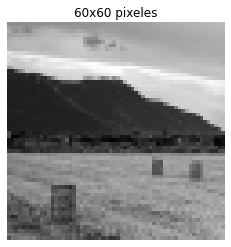

In [31]:
path = './resources'
image = Image.open(path + '/landscape.png')
gs_image = image.convert('L')
dec_img = decimation(np.array(gs_image), 4)
show_image_plt(dec_img, grayscale=True)

In [33]:
dec_img

array([[140.3125, 138.1875, 135.8125, ..., 175.25  , 176.625 , 177.5   ],
       [155.25  , 145.375 , 148.0625, ..., 171.5   , 172.375 , 173.3125],
       [163.75  , 147.5   , 140.5625, ..., 169.5625, 170.125 , 170.6875],
       ...,
       [ 94.5625,  89.0625,  76.625 , ..., 166.25  , 171.1875, 170.9375],
       [115.75  , 118.9375, 112.5   , ..., 160.6875, 155.4375, 163.9375],
       [ 83.    , 116.125 , 111.    , ..., 142.0625, 156.3125, 167.9375]])

## 4.3
Usando funciones de Python ya existentes y una imagen, realice los siguientes puntos:

### 4.3.1
Reajuste el tamaño de la carpeta **Imagenes** a 10 veces su tamaño original

In [6]:
dir_path = '/Users/nestorivanmo/Desktop/iimas-data-science/spring-21/rp/practicas/1/resources/Imagenes/'

#### Reading RAW data

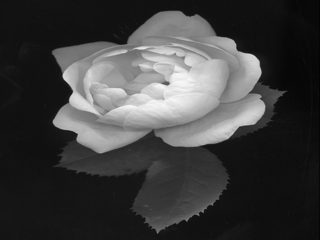

In [7]:
raw_image = np.fromfile(dir_path + 'rosa800x600.raw', dtype=np.uint8).reshape(800, 600)
im = Image.fromarray(raw_image).resize((320, 240))
im

#### Reading DCM data

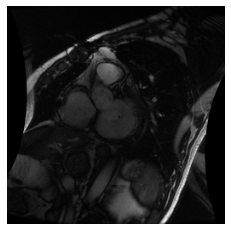

(256, 256)


In [8]:
ds = dcmread(dir_path + 'IM-0001-0007.dcm')
img_array = ds.pixel_array
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()
print(img_array.shape)

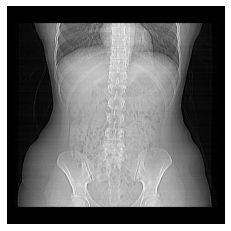

In [9]:
ds = dcmread(dir_path + 'Anonymized20200210.dcm')
img_array = ds.pixel_array
plt.imshow(img_array, cmap='gray')
plt.axis('off')
plt.show()

In [83]:
def read_images(dir_path, verbose=False):
    """
        Se encarga de leer las imágenes de un directorio dado 

        Parámetros:
        -----------
        dir_path : str
            Indica la ruta absoluta del directorio a leer

        verbose : Boolean
            Indica si se imprimen detalles sobre el proceso de rescalamiento
        
        Regresa:
        --------
        images : dict
            Diccionario de imágenes del módulo Pillow : {filename: image_array}
    """
    if verbose:
        print('----------------------------------------------')
        print('---------        ------READING-IMAGES-----------------')
        print('----------------------------------------------\n')
    images = dict()
    for filename in os.listdir(dir_path):
        try :
            (base_name, extension) = split_file(filename)
            if extension == 'raw':
                raw_img = np.fromfile(dir_path + filename, dtype=np.uint8).reshape(800, 600)
                img = Image.fromarray(raw_img)
            elif extension == 'dcm':
                dcm_img = dcmread(dir_path + filename)
                img = dcm_img.pixel_array
            else:
                img = Image.open(dir_path + filename)
            images[filename] = img
            if verbose:
                if extension == 'dcm':
                    img_format = 'DICOM'
                    img_size = img.shape
                    img_mode = 'Grayscale'
                else:
                    img_format = img.format
                    img_size = img.size
                    img_mode = img.mode    
                print(f'Reading \'{filename}\' Status: SUCCEEDED \n\tFormat: {img_format} Size: {img_size} Mode: {img_mode}\n')
                #print('----------------------------------------------\n')
        except Exception as e:
            print(str(e))
            print(f'Reading \'{filename}\' Status: FAILED \n\tFormat: {img.format} Size: {img.size} Mode: {img.mode}\n')
            #print('----------------------------------------------\n')
    return images

def split_file(filename):
    """
        Función encargada de separar un archivo en nombre y extensión

        Parámetros:
        -----------
        filename : str
            String del tipo: '<nombre_archivo>.<extension>'

        Regresa:
        splitted : tuple
            (base_name <str>, extension <str>)
    """
    return filename.split('.')

def resize_image(image, scale, isdcm=False):
    """
        Se encarga de modificar el tamaño de una imagen

        Parámetros:
        -----------
        image : PIL.PngImagePlugin.PngImageFile
            Si la imagen está en formato DICOM, entonces type(image) => ndarray
        
        scale : float
            Entero que indica el tamaño del rescalamiento

        isdcm : Boolean
            Booleano indicando si la imagen se encuentra en formato DICOM

        Regresa:
        --------
        resized_img : PIL.PngImagePlugin.PngImageFile
            Imagen re-escalada
    """
    curr_shape = np.array(image).shape
    curr_size = 1
    for s in curr_shape:
        curr_size *= s
    final_size = curr_size * scale
    if len(curr_shape) == 3:
        d = curr_shape[2]
    else:
        d = 1
    s = int(np.sqrt(final_size / d))
    new_size = (s,s)
    if isdcm:
        return resize(image, new_size)
    return image.resize(new_size)
    
def resize_images(images, scale, verbose=False):
    """
        Encargada de rescalar las imágenes a una escala específica

        Parámetros:
        -----------
        images: Dict
            Diccionario de imágenes en formato Pillow -> {filename: image}

        scale : float
            Entero que indica el tamaño del rescalamiento

        verbose : Boolean
            Indica si se imprimen detalles sobre el proceso de rescalamiento

        Regresa:
        --------
        resized_imgs : dict
            Diccionario de imágenes rescaladas
    """
    if verbose:
        print('\n\n----------------------------------------------')
        print('---------------RESIZING-IMAGES----------------')
        print('----------------------------------------------\n')
    resized_names = []
    resized_images = []
    for filename in images.keys():
        (base_name, extension) = split_file(filename)
        new_name = base_name + '_' + str(scale) + 'x_.' + extension
        resized_names.append(new_name)
        img = images[filename]
        resized_img = resize_image(img, scale, isdcm=True if extension == 'dcm' else False)
        resized_images.append(resized_img)
        if verbose:
            print(f'Resizing \'{filename}\': \n\t Scale: {scale}x \t Old size: {img.size} \t New size:{resized_img.size}\n')
    return dict(zip(resized_names, resized_images))
    

def save_images(images, dir_path, verbose=False):
    """
        Función encargada de guardar las imágenes en un directorio dado

        Parámetros:
        -----------
        images : dict
            Diccionario de imágenes: {filename, image}

        dir_path : str 
            Cadena del directorio en donde se guardará la imagen

        verbose : Boolean
            Indica si se imprimen detalles sobre el proceso de rescalamiento
    """
    if verbose:
        print('\n\n----------------------------------------------')
        print('----------------SAVING-IMAGES-----------------')
        print('----------------------------------------------\n')
    for filename in images.keys():
        (base_name, extension) = split_file(filename)
        img = images[filename]
        if extension == 'raw' or extension == 'dcm':
            img = np.array(img)
            img.tofile(dir_path + '/' + filename)
        else:
            img.save(dir_path + '/' + filename)
        if verbose:
            print(f'Saving \'{filename}\' to dir: \n\t{dir_path}/\n')

#### Reajuste a 10x

In [84]:
save_dir_path = '/Users/nestorivanmo/Desktop/rp_imgs/Imagenes_10x'
images = read_images(dir_path, verbose=True)
resized_images = resize_images(images, scale=10, verbose=True)
save_images(resized_images, save_dir_path, verbose=True)

----------------------------------------------
---------        ------READING-IMAGES-----------------
----------------------------------------------

Reading 'house.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: LA

Reading 'rosa800x600.raw' Status: SUCCEEDED 
	Format: None Size: (600, 800) Mode: L

Reading 'cameraman.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: L

Reading 'peppers_color.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: P

Reading 'IM-0001-0007.dcm' Status: SUCCEEDED 
	Format: DICOM Size: (256, 256) Mode: Grayscale

Reading 'lake.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: LA

Reading 'lena_color_512.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: RGB

Reading 'Anonymized20200210.dcm' Status: SUCCEEDED 
	Format: DICOM Size: (512, 512) Mode: Grayscale



----------------------------------------------
---------------RESIZING-IMAGES----------------
----------------------------------------------

Resizi

### 4.3.2
Reajuste el tamaño de la carpeta **Imagenes** a 3 veces el tamaño original

In [85]:
images = read_images(dir_path, True)
resized_imgs = resize_images(images, scale=3, verbose=True)
save_images(resized_imgs, '/Users/nestorivanmo/Desktop/rp_imgs/' + '/Imagenes_3x', verbose=True)

----------------------------------------------
---------        ------READING-IMAGES-----------------
----------------------------------------------

Reading 'house.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: LA

Reading 'rosa800x600.raw' Status: SUCCEEDED 
	Format: None Size: (600, 800) Mode: L

Reading 'cameraman.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: L

Reading 'peppers_color.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: P

Reading 'IM-0001-0007.dcm' Status: SUCCEEDED 
	Format: DICOM Size: (256, 256) Mode: Grayscale

Reading 'lake.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: LA

Reading 'lena_color_512.tif' Status: SUCCEEDED 
	Format: TIFF Size: (512, 512) Mode: RGB

Reading 'Anonymized20200210.dcm' Status: SUCCEEDED 
	Format: DICOM Size: (512, 512) Mode: Grayscale



----------------------------------------------
---------------RESIZING-IMAGES----------------
----------------------------------------------

Resizi

#### 4.3.3
Rote la imagen a 45, 90 y 180 grados y guárdelas en formato png

In [113]:
def rotate(image, degrees, gs=False):
    """
        Función encargada de rotar y desplegar una imagen una cierta cantidad de grados
        
        Parámetros:face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
        -----------
        image : PIL.PngImagePlugin.PngImageFile
            Imagen en el formato de la librería Pillow

        degrees : double
            Real entre 0 y 360

        gs : Boolean (default = False)
            Bandera que controla si la imagen se despliega en escalas de grises
    """
    if gs:
        image = image.convert('L')
    image = np.array(image.rotate(degrees))
    print(image.shape)
    plt.title(f'Imagen rotada {degrees} grados')
    plt.imshow(image, cmap=plt.cm.gray if gs else None)
    plt.axis('off')
    plt.show()

<class 'PIL.PngImagePlugin.PngImageFile'>
(240, 240, 4)


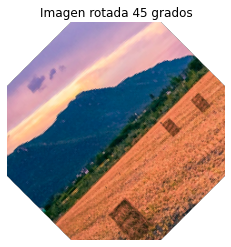

In [114]:
path = '/Users/nestorivanmo/Desktop/iimas-data-science/spring-21/rp/practicas/1/resources'
image = Image.open(path + '/landscape.png')
print(type(image))
rotate(image, 45)

(240, 240, 4)


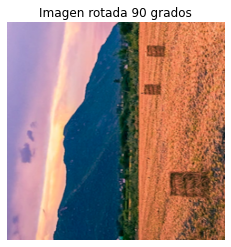

In [115]:
rotate(image, 90)

(240, 240, 4)


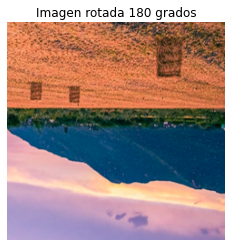

In [116]:
rotate(image, 180)